In [1]:


import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__



'2.8.0.dev20250410+cu128'

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [45]:

import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    

image_path = r"C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray"


# image_path = "C:/Users/Weronika/Downloads/pneumonia-main/archive"
walk_through_dir(image_path)

There are 5 directories and 0 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray'.
There are 3 directories and 1 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray'.
There are 2 directories and 1 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray\test'.
There are 0 directories and 234 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray\test\NORMAL'.
There are 0 directories and 390 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray\test\PNEUMONIA'.
There are 2 directories and 1 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray\train'.
There are 0 directories and 1342 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray\train\NORMAL'.
There are 0 directories and 3876 images in 'C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\chest_xray\train\PNEUMONIA'.
There 

In [46]:

train_dir = "C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/train"
test_dir = "C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/test"
val_dir = "C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/val"
train_dir, test_dir, val_dir



('C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/train',
 'C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/test',
 'C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/val')

In [54]:
import glob
print(f"Sprawdzam pliki w: {image_path}/*/*/*.jpeg")
image_path_list = glob.glob(f"{image_path}/*/*/*.jpeg")
print(f"Liczba znalezionych plików: {len(image_path_list)}")
print(image_path_list[:5])  # pokaż pierwsze 5 ścieżek, jeśli są


Sprawdzam pliki w: C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray/*/*/*.jpeg
Liczba znalezionych plików: 5856
['C:\\Users\\Weronika\\Downloads\\pneumonia-main\\archive\\chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg', 'C:\\Users\\Weronika\\Downloads\\pneumonia-main\\archive\\chest_xray\\test\\NORMAL\\IM-0003-0001.jpeg', 'C:\\Users\\Weronika\\Downloads\\pneumonia-main\\archive\\chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg', 'C:\\Users\\Weronika\\Downloads\\pneumonia-main\\archive\\chest_xray\\test\\NORMAL\\IM-0006-0001.jpeg', 'C:\\Users\\Weronika\\Downloads\\pneumonia-main\\archive\\chest_xray\\test\\NORMAL\\IM-0007-0001.jpeg']


Random image path: C:\Users\Weronika\Downloads\pneumonia-main\archive\chest_xray\train\PNEUMONIA\person663_virus_1247.jpeg
Image class: PNEUMONIA
Image height: 684
Image width: 1104


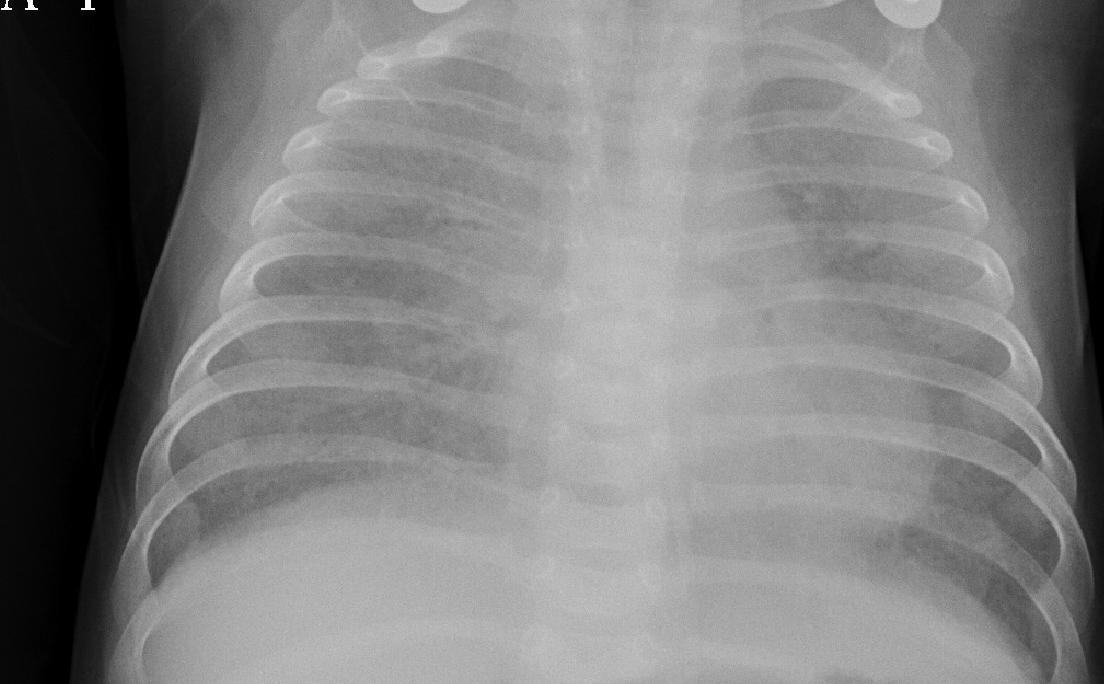

In [56]:

import random
from PIL import Image
import glob
from pathlib import Path

# Set seed
random.seed(42) 

# 1. Get all image paths (* means "any combination")
image_path_list = glob.glob(f"{image_path}/*/*/*.jpeg")


# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = Path(random_image_path).parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img



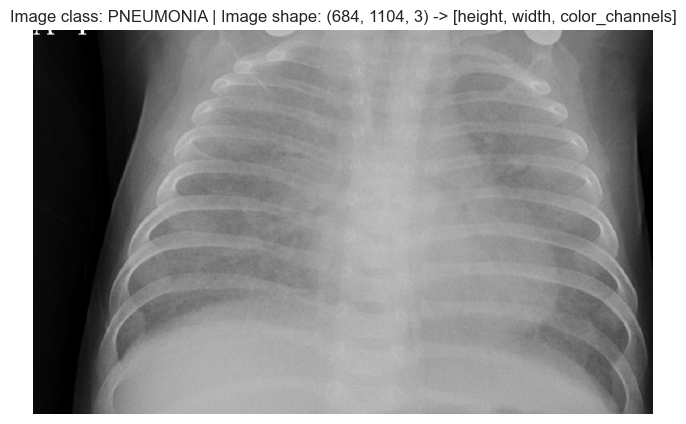

In [57]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);



In [58]:
import glob
import os

image_path = "C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/train"

normal_images = glob.glob(os.path.join(image_path, "NORMAL", "*.jpeg"))
pneumonia_images = glob.glob(os.path.join(image_path, "PNEUMONIA", "*.jpeg"))

print(f"Liczba obrazów NORMAL: {len(normal_images)}")
print(f"Liczba obrazów PNEUMONIA: {len(pneumonia_images)}")

   

Liczba obrazów NORMAL: 1341
Liczba obrazów PNEUMONIA: 3875


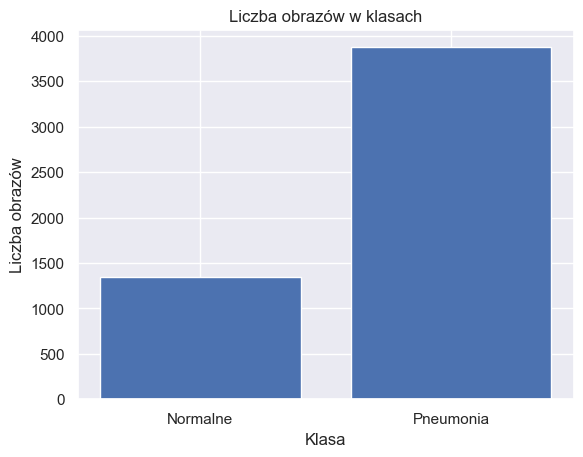

In [59]:
import matplotlib.pyplot as plt

normalne = len(normal_images)
zapalenie = len(pneumonia_images)

labels = ['Normalne', 'Pneumonia']
counts = [normalne, zapalenie]

plt.bar(labels, counts)
plt.title('Liczba obrazów w klasach')
plt.xlabel('Klasa')
plt.ylabel('Liczba obrazów')
plt.show()


In [60]:
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
# PyTorch
import torchvision
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Data science tools
import numpy as np
import pandas as pd
import os

# Image manipulations
from PIL import Image
# Useful for examining network
# from torchsummary import summary
# Timing utility
from timeit import default_timer as timer

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline


import os

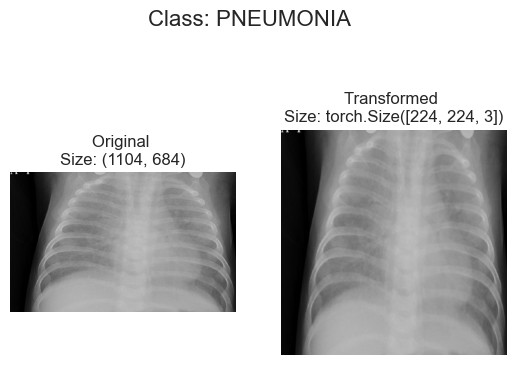

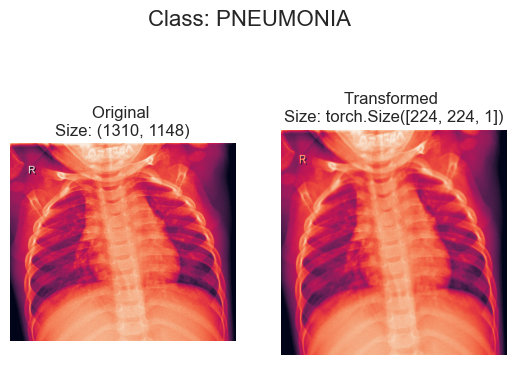

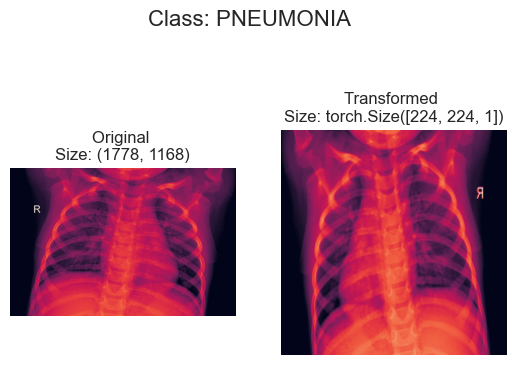

In [61]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to IMAGE_SIZE xIMAGE_SIZE 
    transforms.Resize(size=IMAGE_SIZE),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")
            fig.suptitle(f"Class: {Path(random_image_path).parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, transform=data_transform, n=3)

In [62]:
from torchvision import datasets

# Creating training set
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)
#Creating test set
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)
val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}\nVal data:\n{val_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 5216
    Root location: C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 624
    Root location: C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Val data:
Dataset ImageFolder
    Number of datapoints: 16
    Root location: C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/val
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, ant

In [63]:
# Get class names as a list
class_names = train_data.classes
print("Class names: ",class_names)

# Can also get class names as a dict
class_dict = train_data.class_to_idx
print("Class names as a dict: ",class_dict)

# Check the lengths
print("The lengths of the training and test sets: ", len(train_data), len(test_data),len(val_data))

Class names:  ['NORMAL', 'PNEUMONIA']
Class names as a dict:  {'NORMAL': 0, 'PNEUMONIA': 1}
The lengths of the training and test sets:  5216 624 16


In [64]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.0863, 0.0784, 0.0745,  ..., 0.3725, 0.3725, 0.3725],
         [0.0863, 0.0824, 0.0745,  ..., 0.3647, 0.3725, 0.3725],
         [0.0902, 0.0824, 0.0745,  ..., 0.3647, 0.3686, 0.3647],
         ...,
         [0.1176, 0.1137, 0.1098,  ..., 0.2353, 0.2353, 0.2353],
         [0.1373, 0.1373, 0.1333,  ..., 0.3176, 0.3216, 0.3216],
         [0.1765, 0.1765, 0.1765,  ..., 0.4196, 0.4235, 0.4235]],

        [[0.0863, 0.0784, 0.0745,  ..., 0.3725, 0.3725, 0.3725],
         [0.0863, 0.0824, 0.0745,  ..., 0.3647, 0.3725, 0.3725],
         [0.0902, 0.0824, 0.0745,  ..., 0.3647, 0.3686, 0.3647],
         ...,
         [0.1176, 0.1137, 0.1098,  ..., 0.2353, 0.2353, 0.2353],
         [0.1373, 0.1373, 0.1333,  ..., 0.3176, 0.3216, 0.3216],
         [0.1765, 0.1765, 0.1765,  ..., 0.4196, 0.4235, 0.4235]],

        [[0.0863, 0.0784, 0.0745,  ..., 0.3725, 0.3725, 0.3725],
         [0.0863, 0.0824, 0.0745,  ..., 0.3647, 0.3725, 0.3725],
         [0.0902, 0.0824, 0.0745,  ..., 0.36

Original shape: torch.Size([3, 224, 224]) -> [color_channels, height, width]
Image permute shape: torch.Size([224, 224, 3]) -> [height, width, color_channels]


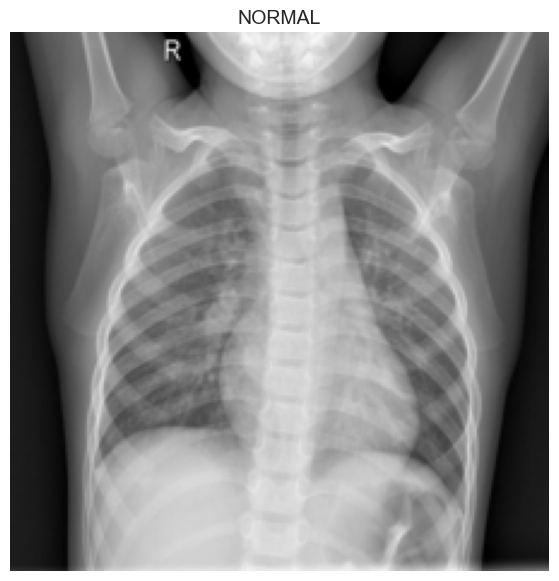

In [65]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [66]:
from torch.utils.data import DataLoader
import os
batch_size = 128
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=batch_size, 
                              num_workers=NUM_WORKERS,
                              shuffle=True)

val_dataloader = DataLoader(dataset=val_data,
                            batch_size=batch_size,
                            num_workers=NUM_WORKERS,
                            shuffle=False)  # walidację zwykle nie mieszamy

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=batch_size, 
                             num_workers=NUM_WORKERS, 
                             shuffle=False)

train_dataloader, val_dataloader, test_dataloader


(<torch.utils.data.dataloader.DataLoader at 0x262de655690>,
 <torch.utils.data.dataloader.DataLoader at 0x264e9294090>)

In [67]:
img, label = next(iter(train_dataloader))

# Note that batch size will now be 1.  
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([128, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([128])


In [68]:


# Set image size.
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# Create training transform with TrivialAugment
train_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.TrivialAugmentWide(),
    transforms.ToTensor()])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])

val_transform = transforms.Compose([
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor()])




In [69]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform)
test_data_augmented = datasets.ImageFolder(test_dir, transform=test_transform)
val_data_augmented = datasets.ImageFolder(val_dir, transform=val_transform)
train_data_augmented, test_data_augmented, val_data_augmented

(Dataset ImageFolder
     Number of datapoints: 5216
     Root location: C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 624
     Root location: C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 16
     Root location: C:/Users/Weronika/Downloads/pneumonia-main/archive/chest_xray/val
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max

In [70]:
# Set some parameters.
BATCH_SIZE = 32
torch.manual_seed(42)

train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_augmented = DataLoader(test_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)
val_dataloader_augmented = DataLoader(val_data_augmented, 
                                       batch_size=BATCH_SIZE, 
                                       shuffle=False, 
                                       num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader_augmented, val_dataloader_augmented

(<torch.utils.data.dataloader.DataLoader at 0x264e711a8d0>,
 <torch.utils.data.dataloader.DataLoader at 0x26280487cd0>)

In [74]:
import torch
import torch.nn as nn

class ImageClassifier(nn.Module):
    def __init__(self, num_classes=2, dropout_p=0.3):
        super().__init__()
        def block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1, bias=False),
                nn.BatchNorm2d(out_ch),
                nn.ReLU(inplace=True),
                nn.MaxPool2d(2)
            )
        # 224 -> 112 -> 56 -> 28
        self.features = nn.Sequential(
            block(3,   64),   # 224 -> 112
            block(64,  128),  # 112 -> 56
            block(128, 256),  # 56  -> 28
        )
        # Głębokość 256 wystarczy; chcesz głębiej – dodaj następny block(256, 512)
        self.tail = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, padding=1, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
        )
        # Global average pooling do 1x1
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=dropout_p),
            nn.Linear(512, num_classes)
        )
        self._init_weights()

    def _init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, nonlinearity="relu")
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1.0)
                nn.init.constant_(m.bias, 0.0)
            elif isinstance(m, nn.Linear):
                nn.init.kaiming_uniform_(m.weight, nonlinearity="linear")
                nn.init.constant_(m.bias, 0.0)

    def forward(self, x):
        x = self.features(x)
        x = self.tail(x)
        x = self.gap(x)           # [B, 512, 1, 1]
        x = self.classifier(x)    # [B, 2]
        return x

model = ImageClassifier().to(device)


In [75]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_augmented))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 224, 224])

Output logits:
tensor([[-0.0314, -0.4521]], device='cuda:0')

Output prediction probabilities:
tensor([[0.6037, 0.3963]], device='cuda:0')

Output prediction label:
tensor([0], device='cuda:0')

Actual label:
1


In [76]:


# Install torchinfo if it's not available, import it if it is

import torchinfo

    
from torchinfo import summary
# do a test pass through of an example input size 
summary(model, input_size=[1, 3, IMAGE_WIDTH ,IMAGE_HEIGHT]) 



Layer (type:depth-idx)                   Output Shape              Param #
ImageClassifier                          [1, 2]                    --
├─Sequential: 1-1                        [1, 256, 28, 28]          --
│    └─Sequential: 2-1                   [1, 64, 112, 112]         --
│    │    └─Conv2d: 3-1                  [1, 64, 224, 224]         1,728
│    │    └─BatchNorm2d: 3-2             [1, 64, 224, 224]         128
│    │    └─ReLU: 3-3                    [1, 64, 224, 224]         --
│    │    └─MaxPool2d: 3-4               [1, 64, 112, 112]         --
│    └─Sequential: 2-2                   [1, 128, 56, 56]          --
│    │    └─Conv2d: 3-5                  [1, 128, 112, 112]        73,728
│    │    └─BatchNorm2d: 3-6             [1, 128, 112, 112]        256
│    │    └─ReLU: 3-7                    [1, 128, 112, 112]        --
│    │    └─MaxPool2d: 3-8               [1, 128, 56, 56]          --
│    └─Sequential: 2-3                   [1, 256, 28, 28]          --
│    │

In [77]:
def train_step(model: torch.nn.Module, 
               dataloader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [78]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [79]:


from tqdm.auto import tqdm
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          val_dataloader: torch.utils.data.DataLoader,   
          optimizer: torch.optim.Optimizer,
          test_dataloader: torch.utils.data.DataLoader = None,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
   
    
    results = {
        "train_loss": [],
        "train_acc": [],
        "val_loss": [],
        "val_acc": []
    }
    
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        
        val_loss, val_acc = test_step(model=model,
                                     dataloader=val_dataloader,
                                     loss_fn=loss_fn)
        
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"val_loss: {val_loss:.4f} | "
            f"val_acc: {val_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["val_loss"].append(val_loss)
        results["val_acc"].append(val_acc)

    # Jeśli masz test, możesz zrobić ewaluację po zakończeniu pętli trenowania
    
    if test_dataloader is not None:
        test_loss, test_acc = test_step(model=model,
                                       dataloader=test_dataloader,
                                       loss_fn=loss_fn)
        print(f"Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}")
        results["test_loss"] = test_loss
        results["test_acc"] = test_acc

    return results


C:\Users\Weronika\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [81]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 25

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_results = train(model=model,
                      train_dataloader=train_dataloader_augmented,
                      test_dataloader=test_dataloader_augmented,
                      val_dataloader=val_dataloader_augmented,
                      optimizer=optimizer,
                      loss_fn=loss_fn,
                      epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  4%|▍         | 1/25 [01:04<25:44, 64.37s/it]

Epoch: 1 | train_loss: 0.3093 | train_acc: 0.8685 | val_loss: 0.4723 | val_acc: 0.6875


  8%|▊         | 2/25 [02:07<24:30, 63.92s/it]

Epoch: 2 | train_loss: 0.3092 | train_acc: 0.8758 | val_loss: 0.5882 | val_acc: 0.8125


 12%|█▏        | 3/25 [03:10<23:08, 63.12s/it]

Epoch: 3 | train_loss: 0.2558 | train_acc: 0.8978 | val_loss: 0.4915 | val_acc: 0.6875


 16%|█▌        | 4/25 [04:12<22:01, 62.92s/it]

Epoch: 4 | train_loss: 0.2417 | train_acc: 0.9057 | val_loss: 2.2973 | val_acc: 0.5625


 20%|██        | 5/25 [05:15<20:57, 62.86s/it]

Epoch: 5 | train_loss: 0.2269 | train_acc: 0.9097 | val_loss: 2.1616 | val_acc: 0.5000


 20%|██        | 5/25 [05:53<23:35, 70.77s/it]


KeyboardInterrupt: 